## Import the relevant libraries

In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load and preprocess the data

In [119]:
raw_data = pd.read_csv('HR_data.csv')
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [120]:
raw_data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [121]:
raw_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [122]:
raw_data.salary.unique()


array(['low', 'medium', 'high'], dtype=object)

In [123]:
raw_data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [124]:
raw_data.loc[raw_data['Department'] == 'RandD'].count()
#No. of randDept is high, cannot eliminate rows with this value. We consider RandD t obe anotherunique value fo the coumn

satisfaction_level       787
last_evaluation          787
number_project           787
average_montly_hours     787
time_spend_company       787
Work_accident            787
left                     787
promotion_last_5years    787
Department               787
salary                   787
dtype: int64

# Visualize target for better understanding of the data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


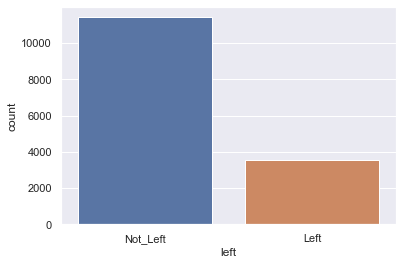

In [125]:
#Here we visualize only target, can plot for all input columns too
data = raw_data.copy()
# visualize the target variable
g = sns.countplot(data['left'])
g.set_xticklabels(['Not_Left','Left'])
plt.show()

# Convert category strings to numeric columns

In [126]:
data = pd.get_dummies(raw_data, drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## Declare the dependent and the independent variables

In [127]:
y = data['left']
x1 = data.drop(['left'], axis = 1)


## Split data into train and test and perform oversampling on training data

In [128]:
#Split data into 80-20 model
x = sm.add_constant(x1)
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=0.2)

In [129]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [130]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros =  RandomOverSampler(sampling_strategy='minority')

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_train, y_train = ros.fit_resample(x_train1, y_train1)

print('Original dataset shape', y_train1.shape)
print('Resample dataset shape', y_train.shape)

Original dataset shape (11999,)
Resample dataset shape (18348,)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


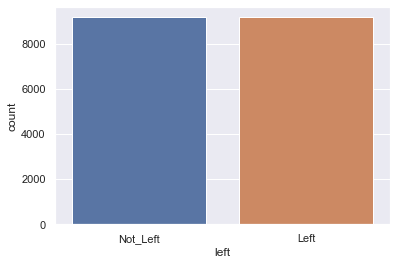

In [131]:

# visualize the target variable
g = sns.countplot(y_train)
g.set_xticklabels(['Not_Left','Left'])
plt.show()

## Regression

In [132]:

reg_log = sm.Logit(y_train,x_train)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.513753
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                18348
Model:                          Logit   Df Residuals:                    18329
Method:                           MLE   Df Model:                           18
Date:                Fri, 27 Aug 2021   Pseudo R-squ.:                  0.2588
Time:                        00:22:18   Log-Likelihood:                -9426.3
converged:                       True   LL-Null:                       -12718.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.1993      0.137     -8.734      0.000      -1.468      -0.930
satisfaction_level        -4.5043      0.083    -53.953      0.000      -4.668      -4.341
last_evaluation            1.1389      0.134      8.478      0.000       0.876       1.402
number_project            -0.4160      0.019    -22.040      0.000      -0.453      -0.379
average_montly_hours       0.0053      0.000     11.389      0.000       0.004       0.006
time_spend_company         0.4886      0.016     31.047      0.000       0.458       0.519
Work_accident             -1.4517      0.066    -21.972      0.000      -1.581      -1.322
promotion_last_5years     -1.6563      0.195     -8.473      0.000      -2.039      -1.273
Department_RandD          -0.3013      0.108     -2.800      0.005      -0.512      -0.090
Department_accounting      0.2364      0.098      2.402      0.016       0.043       0.429
Department_hr              0.3943      0.100      3.933      0.000       0.198       0.591
Department_management     -0.4826      0.122     -3.959      0.000      -0.722      -0.244
Department_marketing       0.1457      0.100      1.457      0.145      -0.050       0.342
Department_product_mng     0.1658      0.095      1.737      0.082      -0.021       0.353
Department_sales           0.1492      0.072      2.068      0.039       0.008       0.291
Department_support         0.2363      0.079      3.009      0.003       0.082       0.390
Department_technical       0.3090      0.076      4.059      0.000       0.160       0.458
salary_low                 1.9162      0.093     20.553      0.000       1.733       2.099
salary_medium              1.3858      0.094     14.778      0.000       1.202       1.570
==========================================================================================
"""

## Accuracy

In [133]:
# This is a method to change the formatting of np arrays
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.28, 0.71, 0.04, ..., 0.48, 0.35, 0.32])

In [134]:
# A prediction table (confusion matrix) showing the 
results_log.pred_table()

array([[6874.00, 2300.00],
       [1757.00, 7417.00]])

In [135]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,6874.0,2300.0
Actual 1,1757.0,7417.0


In [136]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7788859821233922

## Testing the Model

In [137]:
# Condusion Matrix Function(From the Udemy course mentioned in README)
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [138]:
# Create a confusion matrix with the test data
cm = confusion_matrix(x_test,y_test,results_log)
cm

(array([[1689.00, 565.00],
        [145.00, 601.00]]),
 0.7633333333333333)

In [139]:
# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,1689.0,565.0
Actual 1,145.0,601.0


In [140]:
cm[0].sum()

3000.0

In [141]:
# Calculate the accuracy of the model
accuracy_test= (cm[0][0][0]+cm[0][1][1])/cm[0].sum()
accuracy_test

0.7633333333333333

In [142]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
1 - accuracy_test

0.2366666666666667